In [1]:
# import some modules
import numpy as np
import random
import math
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.stats import linregress
%matplotlib inline

# define the rules of basic strategy for two players in Blackjack
def basic_strategy(dh, ph, cards_dealt, deck, bet):
    """
    Makes blackjack moves (hit, stay, split for the player based on basic strategy)
    """
    
    trigger = 0
    ph2 = []
    
    # make sure the dealer hits until 17
    while ((np.sum(dh) <= 17) and (len(deck) >= 1)):

        dh.append(deck[0])         
        cards_dealt.append(deck[0])         
        deck.remove(deck[0]) 
        
    if (trigger == 0):
        if (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
            and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 5) or (dh[0] == 6) \
                 or (dh[0] == 7)) and (len(deck) > 1)):
            
            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            

        elif (ph[0] == 4 and ph[1] == 4) and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1):
            
            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
        elif (ph[0] == 6 and ph[1] == 6) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                              or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1):

            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
            
        elif (ph[0] == 7 and ph[1] == 7) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                              or dh[0] == 5 or dh[0] == 6 or dh[0] == 7) and (len(deck) > 1):
            
             
            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
            
        elif ((ph[0] == 8 and ph[1] == 8) and (len(deck) > 1)):
            

            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
                
        elif ((ph[0] == 9 and ph[1] == 9) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                              or dh[0] == 5 or dh[0] == 6 or dh[0] == 8 \
                                              or dh[0] == 9) and (len(deck) > 1)):
            
            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
            
        elif ((ph[0] == 11 and ph[1] == 11) and (len(deck) > 1)):
            
            # split the hand into two seperate hands 
            ph2 = []
            
            ph2.append(ph[0])
            ph.remove(ph[0])
            ph.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            ph2.append(deck[0])
            cards_dealt.append(deck[0])
            deck.remove(deck[0])
            
        else:
             pass   
          
        # hit stay conditions if a split was made 
        if ((len(ph2) > 0) and (len(deck) > 1) and (np.sum(ph2) <= 17)):  
            while ((np.sum(ph2) <= 17) and (len(deck) >= 1)): 
                if (((np.sum(ph2) == 5) or (np.sum(ph2) == 6) or (np.sum(ph2) == 7) or (np.sum(ph2) == 8)) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph2) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8
                                                or dh[0] == 9 or dh[0] == 10 or dh[0] == 11)) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet


                elif ((np.sum(ph2) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                        #print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0])
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet


                elif ((np.sum(ph2) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                        ph2.append(deck[0])      
                        cards_dealt.append(deck[0])        
                        deck.remove(deck[0]) 
                        continue

                elif ((np.sum(ph2) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                       # print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0])
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet


                elif ((np.sum(ph2) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])    
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif ((np.sum(ph2) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                                  or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                        ph2.append(deck[0])       
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif (((np.sum(ph2) == 13) or (np.sum(ph2) == 14) or (np.sum(ph2) == 15) 
                          or (np.sum(ph2) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                        ph2.append(deck[0])         
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue
                        
                elif (((ph2[0] == 2 and ph2[1] == 2) or (ph2[0] == 3 and ph2[1] == 3)) \
                    and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0]) 
                        continue

                elif ((ph2[0] == 4 and ph2[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                         or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                          or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])         
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif ((ph2[0] == 5 and ph2[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                          or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                          or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                        #print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0]) 
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet


                elif ((ph2[0] == 5 and ph2[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])         
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue


                elif ((ph2[0] == 6 and ph2[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                          or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])         
                        cards_dealt.append(deck[0])   
                        deck.remove(deck[0])
                        continue

                elif ((ph2[0] == 7 and ph2[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                          or dh[0] == 11) and (len(deck) > 1)):
                        ph2.append(deck[0])      
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue

                elif ((ph2[0] == 11 and ph2[1] == 2) or (ph2[0] == 2 and ph2[1] == 11) \
                          or (ph2[0] == 11 and ph2[1] == 3) or (ph2[0] == 3 and ph2[1] == 11) \
                    and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 or dh[0] == 7 or dh[0] == 8 \
                         or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif ((ph2[0] == 11 and ph2[1] == 2) or (ph2[0] == 2 and ph2[1] == 11) \
                          or (ph2[0] == 11 and ph2[1] == 3) or (ph2[0] == 3 and ph2[1] == 11) \
                    and (dh[0] == 5 or dh[0] == 6)) and (len(deck) > 1):

                        #print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0]) 
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet


                elif ((ph2[0] == 11 and ph2[1] == 4) or (ph2[0] == 4 and ph2[1] == 11) \
                          or (ph2[0] == 11 and ph2[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                               or dh[0] == 7 or dh[0] == 8 
                                                               or dh[0] == 9 or dh[0] == 10 
                                                               or dh[0] == 11) and (len(deck) > 1)):
                        ph2.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif ((ph2[0] == 11 and ph2[1] == 4) or (ph2[0] == 4 and ph2[1] == 11) 
                          or (ph2[0] == 11 and ph2[1] == 5) 
                          or (ph2[0] == 5 and ph2[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                                or dh[0] == 6):

                        #print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0]) 
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet


                elif ((ph2[0] == 11 and ph2[1] == 6) or (ph2[0] == 6 and ph2[1] == 11) 
                          and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                               or dh[0] == 11) and (len(deck) > 1)):
                        ph2.append(deck[0])       
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0]) 
                        continue

                elif ((ph2[0] == 11 and ph2[1] == 6) or (ph2[0] == 6 and ph2[1] == 11) 
                          or (ph2[0] == 11 and ph2[1] == 7) or (ph2[0] == 7 and ph2[1] == 11) \
                          and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                        #print('double')
                        ph2.append(deck[0])
                        cards_dealt.append(deck[0])
                        deck.remove(deck[0]) 
                        bet = (bet * 2)
                        return dh, ph, ph2, cards_dealt, bet

                elif ((ph2[0] == 11 and ph2[1] == 7) or (ph2[0] == 7 and ph2[1] == 11) \
                          and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                        ph2.append(deck[0])         
                        cards_dealt.append(deck[0])        
                        deck.remove(deck[0]) 
                        continue
                        
                else:
                    return dh, ph, ph2, cards_dealt, bet
                        
                        
            while ((np.sum(ph) <= 17) and (len(deck) > 1)):
                
                if (((np.sum(ph) == 5) or (np.sum(ph) == 6) or (np.sum(ph) == 7) or (np.sum(ph) == 8)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8
                                            or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((np.sum(ph) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((np.sum(ph) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                   # print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])    
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                              or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 2) and (dh[0] <= 6))):

                    return dh, ph, ph2, cards_dealt, bet
                
                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
                and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 4 and ph[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                     or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                      or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                      or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 6 and ph[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue



                elif ((ph[0] == 7 and ph[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                      or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 9 and ph[1] == 9) and (dh[0] == 7 or dh[0] == 10 or dh[0] == 11)):

                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 10 and ph[1] == 10)):

                    return dh, ph, ph2, cards_dealt, bet


                elif ((((ph[0] == 11) and (ph[1] == 2)) or ((ph[0] == 2) and (ph[1] == 11))
                      or ((ph[0] == 11) and (ph[1] == 3)) or ((ph[0] == 3) and (ph[1] == 11))) \
                and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 7) or (dh[0] == 8) \
                     or (dh[0] == 9) or (dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 2) or (ph[0] == 2 and ph[1] == 11)
                      or (ph[0] == 11 and ph[1] == 3) or (ph[0] == 3 and ph[1] == 11) \
                and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                           or dh[0] == 7 or dh[0] == 8 
                                                           or dh[0] == 9 or dh[0] == 10 
                                                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) 
                      or (ph[0] == 5 and ph[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                            or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8)):

                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and (ph[1] == 8 or ph[1] == 9 or ph[1] == 10)) 
                      or ((ph[0] == 8 or ph[1] == 9 or ph[1] == 10) and ph[1] == 11)):

                    return dh, ph, ph2, cards_dealt, bet
                    
                else:
                    return dh, ph, ph2, cards_dealt, bet
                    

        # conditions if no split was made
        elif ((len(ph2) == 0) and (len(deck) > 1) and (np.sum(ph2) <= 17)):    
             while ((np.sum(ph) <= 17) and (len(deck) > 1)):  
                if (((np.sum(ph) == 5) or (np.sum(ph) == 6) or (np.sum(ph) == 7) or (np.sum(ph) == 8)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8 \
                or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((np.sum(ph) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet
                
                elif ((np.sum(ph) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                   # print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])    
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                              or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 2) and (dh[0] <= 6))):

                    return dh, ph, ph2, cards_dealt, bet

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
                and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 4 and ph[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                     or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                      or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                      or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 6 and ph[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue



                elif ((ph[0] == 7 and ph[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                      or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 9 and ph[1] == 9) and (dh[0] == 7 or dh[0] == 10 or dh[0] == 11)):

                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 10 and ph[1] == 10)):

                    return dh, ph, ph2, cards_dealt, bet


                elif ((((ph[0] == 11) and (ph[1] == 2)) or ((ph[0] == 2) and (ph[1] == 11))
                      or ((ph[0] == 11) and (ph[1] == 3)) or ((ph[0] == 3) and (ph[1] == 11))) \
                and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 7) or (dh[0] == 8) \
                     or (dh[0] == 9) or (dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 2) or (ph[0] == 2 and ph[1] == 11)
                      or (ph[0] == 11 and ph[1] == 3) or (ph[0] == 3 and ph[1] == 11) \
                and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                           or dh[0] == 7 or dh[0] == 8 
                                                           or dh[0] == 9 or dh[0] == 10 
                                                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) 
                      or (ph[0] == 5 and ph[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                            or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8)):

                    return dh, ph, ph2, cards_dealt, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and (ph[1] == 8 or ph[1] == 9 or ph[1] == 10)) 
                      or ((ph[0] == 8 or ph[1] == 9 or ph[1] == 10) and ph[1] == 11)):

                    return dh, ph, ph2, cards_dealt, bet
                    
                else:
                    return dh, ph, ph2, cards_dealt, bet  
        else:
            pass
        
    return dh, ph, ph2, cards_dealt, bet

# create a function to tell player to hit or stay based on the true count
def ill_18(dealers_hand, players_hand, cards_dealt, deck, bet):   
   
    """
    Makes blackjack moves based on Hi-LO system and true count (see illustrious 18)
    """
    
    trigger = 0
    global true_count
    ph2 = []


    # change variable names for the while loop
    ph = players_hand
    dh = dealers_hand
        
    #run the count for the cards in the dealers hand and the players hand
    r_count, r_count_list = count_cards(all_cards_dealt) #count at end
    
    # compute the thrue count
    if ((len(deck) != 0.) and ((len(deck) / 52) != 0.)):
        # compute the true count (running count / # of decks remaining) so that player can hit or stay
        true_count = (r_count / ((len(deck) / 52)))
        
    else:
        pass
    
 
    while (((np.sum(ph) <= 17) and (len(deck) > 1) and (trigger == 0))):
            if (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
            and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 5) or (dh[0] == 6) \
                 or (dh[0] == 7)) and (len(deck) > 1)):


                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1

            elif (ph[0] == 4 and ph[1] == 4) and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1):


                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1


            elif ((ph[0] == 6 and ph[1] == 6) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                  or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1


            elif ((ph[0] == 7 and ph[1] == 7) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                  or dh[0] == 5 or dh[0] == 6 or dh[0] == 7) and (len(deck) > 1)):
                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1


            elif ((ph[0] == 8 and ph[1] == 8) and (len(deck) > 1)):

                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1


            elif ((ph[0] == 9 and ph[1] == 9) and ((dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                  or dh[0] == 5 or dh[0] == 6 or dh[0] == 8 \
                                                  or dh[0] == 9)) and (len(deck) > 1)):

                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1

            elif (ph[0] == 11 and ph[1] == 11 and (len(deck) > 1)):

                # split the hand into two seperate hands 
                ph2 = []

                ph2.append(ph[0])
                ph.remove(ph[0])
                ph.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])
                ph2.append(deck[0])
                cards_dealt.append(deck[0])
                deck.remove(deck[0])

                trigger = 1
                
            else:
                return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet
            
        
    if ((len(ph2) > 0) and (len(deck) > 1)):
            
            while ((np.sum(ph2) <= 17) and (len(deck) >= 1)):
                
                if ((np.sum(ph2) == 9) and (dh[0] == 2) and (true_count < 1) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 9) and (dh[0] == 7) and (true_count < 3) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
                elif ((np.sum(ph2) == 10) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 10) and (dh[0] == 11) and (true_count < 4) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
    
                elif ((np.sum(ph2) == 11) and (dh[0] == 11) and (true_count < 1) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 12) and (dh[0] == 6) and (true_count < -1) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 12) and (dh[0] == 5) and (true_count < -2) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 12) and (dh[0] == 4) and (true_count < 0) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 12) and (dh[0] == 3) and (true_count < 2) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 12) and (dh[0] == 2) and (true_count < 3) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
                    
                    
                elif ((np.sum(ph2) == 13) and (dh[0] == 2) and (true_count < -1) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 13) and (dh[0] == 3) and (true_count < -2) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
                    
                elif ((np.sum(ph2) == 15) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 16) and (dh[0] == 10) and (true_count < 0) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 16) and (dh[0] == 9) and (true_count < 5) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
    
                elif (((ph2[0] == 10) and (ph2[1] == 10) and (dh[0] == 5) and (true_count < 5)) and (len(deck) > 1)):
                        ph2.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue

                elif (((ph2[0] == 10) and (ph2[1] == 10) and (dh[0] == 6) and (true_count < 4)) and (len(deck) > 1)):
                        ph2.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue
                        
                elif ((np.sum(ph2) == 5) or (np.sum(ph2) == 6) \
                or (np.sum(ph2) == 7) or (np.sum(ph2) == 8) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph2) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8
                                            or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph2) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph2) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph2.append(deck[0])      
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                   # print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph2) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])    
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph2) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                              or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                    ph2.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph2) == 13) or (np.sum(ph2) == 14) or (np.sum(ph2) == 15) 
                      or (np.sum(ph2) == 16)) and ((dh[0] >= 2) and (dh[0] <= 6)) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif (((np.sum(ph2) == 13) or (np.sum(ph2) == 14) or (np.sum(ph2) == 15) 
                      or (np.sum(ph2) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif (((ph2[0] == 2 and ph2[1] == 2) or (ph2[0] == 3 and ph2[1] == 3)) \
                and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    continue

                elif ((ph2[0] == 4 and ph2[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                     or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph2[0] == 5 and ph2[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                      or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                      or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 5 and ph2[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph2[0] == 6 and ph2[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue



                elif ((ph2[0] == 7 and ph2[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                      or dh[0] == 11) and (len(deck) > 1)):
                    ph2.append(deck[0])      
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph2[0] == 9 and ph2[1] == 9) and (dh[0] == 7 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 10 and ph2[1] == 10)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet


                elif ((((ph2[0] == 11) and (ph2[1] == 2)) or ((ph2[0] == 2) and (ph2[1] == 11))
                      or ((ph2[0] == 11) and (ph2[1] == 3)) or ((ph2[0] == 3) and (ph2[1] == 11))) \
                and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 7) or (dh[0] == 8) \
                     or (dh[0] == 9) or (dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph2[0] == 11 and ph2[1] == 2) or (ph2[0] == 2 and ph2[1] == 11)
                      or (ph2[0] == 11 and ph2[1] == 3) or (ph2[0] == 3 and ph2[1] == 11) \
                and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 11 and ph2[1] == 4) or (ph2[0] == 4 and ph2[1] == 11) 
                      or (ph2[0] == 11 and ph2[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                           or dh[0] == 7 or dh[0] == 8 
                                                           or dh[0] == 9 or dh[0] == 10 
                                                           or dh[0] == 11) and (len(deck) > 1)):
                    ph2.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((ph2[0] == 11 and ph2[1] == 4) or (ph2[0] == 4 and ph2[1] == 11) 
                      or (ph2[0] == 11 and ph2[1] == 5) 
                      or (ph2[0] == 5 and ph2[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                            or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 11 and ph2[1] == 6) or (ph2[0] == 6 and ph2[1] == 11) 
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                           or dh[0] == 11) and (len(deck) > 1)):
                    ph2.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph2[0] == 11 and ph2[1] == 6) or (ph2[0] == 6 and ph2[1] == 11) 
                      or (ph2[0] == 11 and ph2[1] == 7) or (ph2[0] == 7 and ph2[1] == 11) \
                      and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph2.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 11 and ph2[1] == 7) or (ph2[0] == 7 and ph2[1] == 11) \
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph2[0] == 11 and ph2[1] == 7) or (ph2[0] == 7 and ph2[1] == 11) \
                      and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph2.append(deck[0])         
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((ph2[0] == 11 and (ph2[1] == 8 or ph2[1] == 9 or ph2[1] == 10)) 
                      or ((ph2[0] == 8 or ph2[1] == 9 or ph2[1] == 10) and ph2[1] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet
                    
                else:
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet 

            while ((np.sum(ph) <= 17) and (len(deck) > 1)):
                
                if ((np.sum(ph) == 9) and (dh[0] == 2) and (true_count < 1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 7) and (true_count < 3) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
                elif ((np.sum(ph) == 10) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 10) and (dh[0] == 11) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
    
                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (true_count < 1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 6) and (true_count < -1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 5) and (true_count < -2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 4) and (true_count < 0) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 3) and (true_count < 2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 2) and (true_count < 3) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
                    
                    
                elif ((np.sum(ph) == 13) and (dh[0] == 2) and (true_count < -1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 13) and (dh[0] == 3) and (true_count < -2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
                    
                elif ((np.sum(ph) == 15) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 16) and (dh[0] == 10) and (true_count < 0) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 16) and (dh[0] == 9) and (true_count < 5) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
    
                elif (((ph[0] == 10) and (ph[1] == 10) and (dh[0] == 5) and (true_count < 5)) and (len(deck) > 1)):
                        ph.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue

                elif (((ph[0] == 10) and (ph[1] == 10) and (dh[0] == 6) and (true_count < 4)) and (len(deck) > 1)):
                        ph.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue
                        
                elif ((np.sum(ph) == 5) or (np.sum(ph) == 6) \
                or (np.sum(ph) == 7) or (np.sum(ph) == 8) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8
                                            or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                   # print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])    
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                              or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 2) and (dh[0] <= 6)) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
                and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 4 and ph[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                     or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                      or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                      or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 6 and ph[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue



                elif ((ph[0] == 7 and ph[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                      or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 9 and ph[1] == 9) and (dh[0] == 7 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 10 and ph[1] == 10)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet


                elif ((((ph[0] == 11) and (ph[1] == 2)) or ((ph[0] == 2) and (ph[1] == 11))
                      or ((ph[0] == 11) and (ph[1] == 3)) or ((ph[0] == 3) and (ph[1] == 11))) \
                and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 7) or (dh[0] == 8) \
                     or (dh[0] == 9) or (dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 2) or (ph[0] == 2 and ph[1] == 11)
                      or (ph[0] == 11 and ph[1] == 3) or (ph[0] == 3 and ph[1] == 11) \
                and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                           or dh[0] == 7 or dh[0] == 8 
                                                           or dh[0] == 9 or dh[0] == 10 
                                                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) 
                      or (ph[0] == 5 and ph[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                            or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and (ph[1] == 8 or ph[1] == 9 or ph[1] == 10)) 
                      or ((ph[0] == 8 or ph[1] == 9 or ph[1] == 10) and ph[1] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet
                    
                else:
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet
                
    elif ((len(ph2) == 0) and (len(deck) > 1)):
            while ((np.sum(ph) <= 17) and (len(deck) > 1)):
                if ((np.sum(ph) == 9) and (dh[0] == 2) and (true_count < 1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 7) and (true_count < 3) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
                elif ((np.sum(ph) == 10) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 10) and (dh[0] == 11) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
    
                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (true_count < 1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 6) and (true_count < -1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 5) and (true_count < -2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 4) and (true_count < 0) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 3) and (true_count < 2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 12) and (dh[0] == 2) and (true_count < 3) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
                    
                    
                elif ((np.sum(ph) == 13) and (dh[0] == 2) and (true_count < -1) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 13) and (dh[0] == 3) and (true_count < -2) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue
                    
                elif ((np.sum(ph) == 15) and (dh[0] == 10) and (true_count < 4) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 16) and (dh[0] == 10) and (true_count < 0) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 16) and (dh[0] == 9) and (true_count < 5) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue
    
    
                elif (((ph[0] == 10) and (ph[1] == 10) and (dh[0] == 5) and (true_count < 5)) and (len(deck) > 1)):
                        ph.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue

                elif (((ph[0] == 10) and (ph[1] == 10) and (dh[0] == 6) and (true_count < 4)) and (len(deck) > 1)):
                        ph.append(deck[0])        
                        cards_dealt.append(deck[0])         
                        deck.remove(deck[0])
                        continue
                        
                elif ((np.sum(ph) == 5) or (np.sum(ph) == 6) \
                or (np.sum(ph) == 7) or (np.sum(ph) == 8) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 2 or dh[0] == 6 or dh[0] == 7 or dh[0] == 8
                                            or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 9) and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 10) and ((dh[0] >= 2) and (dh[0] <= 9)) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 10) and ((dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 11) and ((dh[0] >= 2) and (dh[0] <= 10)) and (len(deck) > 1)):

                   # print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((np.sum(ph) == 11) and (dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])    
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((np.sum(ph) == 12) and (((dh[0] == 2) or (dh[0] == 3)) 
                                              or ((dh[0] >= 7) and (dh[0] <= 11))) and (len(deck) > 1)):

                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 2) and (dh[0] <= 6)) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif (((np.sum(ph) == 13) or (np.sum(ph) == 14) or (np.sum(ph) == 15) 
                      or (np.sum(ph) == 16)) and ((dh[0] >= 7) and (dh[0] <= 11)) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0])
                    continue

                elif (((ph[0] == 2 and ph[1] == 2) or (ph[0] == 3 and ph[1] == 3)) \
                and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 4 and ph[1] == 4) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                     or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 or dh[0] == 4 \
                                                      or dh[0] == 5 or dh[0] == 6 or dh[0] == 7 \
                                                      or dh[0] == 8 or dh[0] == 9) and (len(deck) > 1)):
                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 5 and ph[1] == 5) and (dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue


                elif ((ph[0] == 6 and ph[1] == 6) and (dh[0] == 7 or dh[0] == 8 or dh[0] == 9 \
                                                      or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue



                elif ((ph[0] == 7 and ph[1] == 7) and (dh[0] == 8 or dh[0] == 9 or dh[0] == 10 \
                                                      or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])      
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 9 and ph[1] == 9) and (dh[0] == 7 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 10 and ph[1] == 10)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet


                elif ((((ph[0] == 11) and (ph[1] == 2)) or ((ph[0] == 2) and (ph[1] == 11))
                      or ((ph[0] == 11) and (ph[1] == 3)) or ((ph[0] == 3) and (ph[1] == 11))) \
                and ((dh[0] == 2) or (dh[0] == 3) or (dh[0] == 4) or (dh[0] == 7) or (dh[0] == 8) \
                     or (dh[0] == 9) or (dh[0] == 10) or (dh[0] == 11)) and (len(deck) > 1)):

                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 2) or (ph[0] == 2 and ph[1] == 11)
                      or (ph[0] == 11 and ph[1] == 3) or (ph[0] == 3 and ph[1] == 11) \
                and (dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) and (dh[0] == 2 or dh[0] == 3 
                                                           or dh[0] == 7 or dh[0] == 8 
                                                           or dh[0] == 9 or dh[0] == 10 
                                                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])        
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif (((ph[0] == 11 and ph[1] == 4) or (ph[0] == 4 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 5) 
                      or (ph[0] == 5 and ph[1] == 11)) and (dh[0] == 4 or dh[0] == 5 
                                                            or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8 or dh[0] == 9 or dh[0] == 10 
                           or dh[0] == 11) and (len(deck) > 1)):
                    ph.append(deck[0])       
                    cards_dealt.append(deck[0])         
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and ph[1] == 6) or (ph[0] == 6 and ph[1] == 11) 
                      or (ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 3 or dh[0] == 4 or dh[0] == 5 or dh[0] == 6) and (len(deck) > 1)):

                    #print('double')
                    ph.append(deck[0])
                    cards_dealt.append(deck[0])
                    deck.remove(deck[0]) 
                    bet = (bet * 2)
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 2 or dh[0] == 7 or dh[0] == 8) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

                elif ((ph[0] == 11 and ph[1] == 7) or (ph[0] == 7 and ph[1] == 11) \
                      and (dh[0] == 9 or dh[0] == 10 or dh[0] == 11) and (len(deck) > 1)):

                    ph.append(deck[0])         
                    cards_dealt.append(deck[0])        
                    deck.remove(deck[0]) 
                    continue

                elif ((ph[0] == 11 and (ph[1] == 8 or ph[1] == 9 or ph[1] == 10)) 
                      or ((ph[0] == 8 or ph[1] == 9 or ph[1] == 10) and ph[1] == 11) and (len(deck) > 1)):

                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet
                    
                else:
                    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet            
    else:
        pass
            
    while ((np.sum(dh) <= 17) and (len(deck) >= 1)):
        dh.append(deck[0])         
        cards_dealt.append(deck[0])         
        deck.remove(deck[0]) 
            
    #run the count for the cards in the dealers hand and the players hand
    r_count, r_count_list = count_cards(all_cards_dealt) #count at end
    
    if (len(deck) != 0.):
        # compute the true count (running count / # of decks remaining) so that player can hit or stay
        true_count = (r_count / ((len(deck) / 52)))
        
    else:
        pass
    
    return dh, ph, ph2, cards_dealt, r_count_list, true_count, bet

# create a function to generate N decks
def n_decks(n):
    """Generates n decks, shuffled"""
    
    #create a single deck of cards
    one_suit = list(np.arange(2,11))

    # create face cards and an ace and add them to the deck
    J = 10
    K = 10
    Q = 10
    A = 11
    one_suit.append(J)
    one_suit.append(K)
    one_suit.append(Q)
    one_suit.append(A)

    one_deck = one_suit*4
    
    # generate n decks
    n_decks = one_deck*n
    
    # shuffle the decks
    random.shuffle(n_decks)
    
    return n_decks


# create a function to count cards as the are drawn from the shoe
def count_cards(one_deck): 
    """Counts card by card, for N number of decks"""
    
    all_counts = [] #an empty list to populate with each cards value
    running_count = 0 # the running count at the beggining of the deck

    # assign values to each card in the deck
    for i in one_deck:
        if i <= 6:
            one_count = 1
        elif i == 7:
            one_count = 0
        elif i == 8:
            one_count = 0
        elif i == 9:
            one_count = 0
        elif i >= 10:
            one_count = -1
        # populate a list to end up with a list of card values
        all_counts.append(one_count)
    
    running_count_list = [] ## NEED TO DECIDE if I should start the list with a zero
    # iterate through the list of all card values and add to the running count one by one
    for i in range(len(all_counts)):
        running_count += all_counts[i]
        running_count_list.append(running_count)
    
    return running_count, running_count_list

def p1_play_blackjack_onetime(one_deck, b):
    
    """
    -------------------------------------------------------------------------------
    Play a game of blackjack with a dealer and single player
    -------------------------------------------------------------------------------
    Takes a deck of cards as an input and plays one hand of blackjack with the deck
    -------------------------------------------------------------------------------
    Returns: The value of the dealers hand, the players hand, who won and the running
             count at the end of the match.
    -------------------------------------------------------------------------------
    """
    global bet
    bet = b
    # create two hands: a dealer and player, to deal cards to
    dealers_hand = []
    players_hand = []
    cards_dealt = []
    
    # deal cards (player then dealer)
    for i in range(2):
        players_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])
        dealers_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])

    # conditional statements to decide to hit or stay (based on traditional rules)
    while ((np.sum(players_hand) <= 17) and (len(one_deck) >= 1)):
        players_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])
            
    if np.sum(players_hand) >= 17:
        players_hand = players_hand   
    else:
        pass

    while ((np.sum(dealers_hand) <= 17) and (len(one_deck) >= 1)):
        dealers_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])
            
    if np.sum(dealers_hand) >= 17:
        dealers_hand = dealers_hand
    else:
        pass
    
    #run the count for the cards in the dealers hand and the players hand
    r_count, r_count_list = count_cards(cards_dealt) #count at end
    
    # conserve the hands as lists in seperate variables
    dealers_hand_list = dealers_hand
    players_hand_list = players_hand
    
    # convert the list of cards for each hand into an integer
    dealers_hand = int(np.sum(dealers_hand_list))
    players_hand = int(np.sum(players_hand_list))
    
    # decide who wins (-1 = dealer win, 0 = push, 1 = player win)
    # dealer wins when:
    if ((dealers_hand > players_hand) and (dealers_hand <= 21)):
        winner = -1.0
    elif ((players_hand > 21) and (dealers_hand <= 21)):
        winner = -1.0
    elif ((players_hand > 21) and (dealers_hand > 21)):
        winner =  -1.0  
        
    #player wins when:
    elif ((players_hand > dealers_hand) and (players_hand <= 21)):
        winner = 1.0
    elif ((dealers_hand > 21) and (players_hand <= 21)):
        winner = 1.0
    elif ((players_hand == 21) and ((len(players_hand_list)) == 2) and \
          (players_hand != dealers_hand)):
        winner = 1.0

    # push when:
    elif (players_hand == dealers_hand):
        winner = 0.0
        
    money = (bet*winner)
        
    # final results to return: each hand value (as well as list form) and who won
    return dealers_hand_list, players_hand_list, dealers_hand, players_hand, \
            winner, cards_dealt, r_count_list, money
    
    
# create a function to play blackjack with N decks of cards in the shoe
def p1_play_blackjack(N, b, table=False):
    """Plays blackjack with two players to the end of the shoe with N decks"""
    global bet
    bet = b
    # generate a shoe to play with containing N shuffled decks
    shoe = n_decks(N)
  
    ## were going to need to keep track of a lot of data here (populate), including:
    ## all the cards that have been dealt after N games (so we can count them)
    ## the hands of the dealer throughout N games (for the print table option)
    ## the hands of the player throughout N games (for the print table option)
    ## the win loss record
    ## the count at the end of each round
    ## index list to locate what the running count was at the end of each round
    all_cards_dealt = []
    dealer_cards = []
    player_cards = []
    win_loss_record = []
    r_count_at_round = []
    cards_left = []
    index = []
    winnings = []
    winnings_list = []
    
    # populate the empty lists seen above with relevant data
    while len(shoe) >= 4:
        d_h_list, p_h_list, d_h, p_h, win, cards_dealt, r_count_list, money \
        = p1_play_blackjack_onetime(shoe, bet) #unpack the returns from function
        
        # store the data (carsd dealt, player/dealer hands, wins/losses,the index
        all_cards_dealt += cards_dealt
        cards_left.append(len(all_cards_dealt))
        dealer_cards.append(d_h_list)
        player_cards.append(p_h_list)
        win_loss_record.append(win)
        index.append(len(all_cards_dealt))
        winnings.append(money)
        winnings_list.append(money)
    
    # calculate how many cards are left in the shoe (in terms of decks remaining)
    cards_left = np.array(cards_left)
    cards_left = ((N * 52.) - (cards_left))
    decks_left_at_round = (cards_left / 52.)
    
    
    # create an array to index all_cards_dealt after counting them to grab
    ## the running count at the end of each round played
    index = (np.array(index)) - 1
    r_count, r_list = count_cards(all_cards_dealt)
    
    for i in index:
        r_count_at_round.append(r_list[i])
        
    #since the count is zero at the start of the game insert a count of zero at the start
    r_count_at_round.insert(0,0)
    
    #the final element is irrelevant bc we dont play the next hand
    r_count_at_round = r_count_at_round[:-1]
        
    r_count_at_round = np.array(r_count_at_round)
    
    # create an array that represents the true count at the end of each round
    t_count_at_round = r_count_at_round / decks_left_at_round
    
    # assign a variable representing how many games have been played
    games_played = len(win_loss_record)
    
    # how much money we won or lost
    winnings = np.sum(winnings)
    
    # a conditional statement to print the data table if requested by user
    if (table == True):
        print('|___________________________________________________________________________|')
        print('|            {:} games of Blackjack played with a {:} deck shoe                |'
             .format(games_played, N))
        print('|                                                                           |')
        print('|___________________________________________________________________________|')
        print('| Running count |   True count  | Dealers hand | Players hand | wins/losses |')
        for i in range(games_played):
            print('|___________________________________________________________________________|')
            print('|{:10}     |    {:^7.1f}    |{:10}    |{:10}    |{:10}   |'
                 .format(r_count_at_round[i], t_count_at_round[i], np.sum(dealer_cards[i]), 
                         np.sum(player_cards[i]), win_loss_record[i]))
        print('|___________________________________________________________________________|')

    # the return statement give me a win loss record for n games given one_deck*N decks
    # as well as a record of the running_count at the point of each win/loss/push
    return games_played, win_loss_record, r_count_at_round, t_count_at_round, winnings, winnings_list


# write a function to play one hand of blackjack
def p2_play_blackjack_onetime(one_deck, b):
    
    """
    -------------------------------------------------------------------------------
    Play a game of blackjack with a dealer and single player
    -------------------------------------------------------------------------------
    Takes a deck of cards as an input and plays one hand of blackjack with the deck
    -------------------------------------------------------------------------------
    Returns: The value of the dealers hand, the players hand, who won and the running
             count at the end of the match.
    -------------------------------------------------------------------------------
    """
    global bet
    bet = b
    # create two hands: a dealer and player, to deal cards to
    dealers_hand = []
    players_hand = []
    players_hand2 = []
    cards_dealt = []
    
    # deal cards (player then dealer)
    for i in range(2):
        players_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])
        dealers_hand.append(one_deck[0])
        cards_dealt.append(one_deck[0])
        one_deck.remove(one_deck[0])
        
        
    dealers_hand, players_hand, players_hand2, cards_dealt, bet = \
    basic_strategy(dealers_hand, players_hand, cards_dealt, one_deck, bet)
        
    # conserve the hands as lists in seperate variables
    dealers_hand_list = dealers_hand
    players_hand_list = players_hand
    players_hand_list2 = players_hand2

    # convert the list of cards for each hand into an integer
    dealers_hand = int(np.sum(dealers_hand_list))
    players_hand = int(np.sum(players_hand_list))
    players_hand2 = int(np.sum(players_hand_list2))

#     else:
#         dealers_hand, players_hand, cards_dealt = \
#         basic_strategy(dealers_hand, players_hand, cards_dealt, one_deck)
        
#         # conserve the hands as lists in seperate variables
#         dealers_hand_list = dealers_hand
#         players_hand_list = players_hand

#         # convert the list of cards for each hand into an integer
#         dealers_hand = int(np.sum(dealers_hand_list))
#         players_hand = int(np.sum(players_hand_list))
    
    #run the count for the cards in the dealers hand and the players hand
    r_count, r_count_list = count_cards(cards_dealt) #count at end
    
    winner = 0
    
    # decide who wins (-1 = dealer win, 0 = push, 1 = player win)
    if ((players_hand2) != 0):
        # dealer wins when:
        if (((dealers_hand > players_hand) and (dealers_hand <= 21)) \
        and ((dealers_hand > players_hand2) and (dealers_hand <= 21))):
            winner = -2.0
        elif (((players_hand > 21) and (dealers_hand <= 21)) and ((players_hand2 > 21) and (dealers_hand <= 21))):
            winner = -2.0
        elif (((players_hand > 21) and (dealers_hand > 21)) and ((players_hand2 > 21) and (dealers_hand > 21))):
            winner =  -2.0  

        #player wins when:
        elif ((players_hand > dealers_hand) and (players_hand <= 21)) \
        or ((players_hand2 > dealers_hand) and (players_hand2 <= 21)):
            winner = 1.0
        elif (((dealers_hand > 21) and (players_hand <= 21)) or ((dealers_hand > 21) and (players_hand2 <= 21))):
            winner = 1.0
        elif (((players_hand == 21) and (((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand))) or ((players_hand2 == 21) and ((len(players_hand_list2)) == 2) and \
              (players_hand2 != dealers_hand))):
            winner = 1.0
        elif ((players_hand > dealers_hand) and (players_hand <= 21)) \
        and ((players_hand2 > dealers_hand) and (players_hand2 <= 21)):
            winner = 2.0
        elif (((dealers_hand > 21) and (players_hand <= 21)) and ((dealers_hand > 21) and (players_hand2 <= 21))):
            winner = 2.0
        elif (((players_hand == 21) and (((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand))) and ((players_hand2 == 21) and ((len(players_hand_list2)) == 2) and \
              (players_hand2 != dealers_hand))):
            winner = 2.0
        

        # push when:
        elif ((players_hand == dealers_hand) or (players_hand == dealers_hand)):
            winner = 0.0
        
        else:
            pass
        
    else:
        # dealer wins when:
        if ((dealers_hand > players_hand) and (dealers_hand <= 21)):
            winner = -1.0
        elif ((players_hand > 21) and (dealers_hand <= 21)):
            winner = -1.0
        elif ((players_hand > 21) and (dealers_hand > 21)):
            winner =  -1.0  

        #player wins when:
        elif ((players_hand > dealers_hand) and (players_hand <= 21)):
            winner = 1.0
        elif ((dealers_hand > 21) and (players_hand <= 21)):
            winner = 1.0
        elif ((players_hand == 21) and ((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand)):
            winner = 1.0

        # push when:
        elif (players_hand == dealers_hand):
            winner = 0.0
            
        else:
            pass
        
    money = (bet*winner)
    
    return dealers_hand_list, players_hand_list, players_hand_list2, dealers_hand, players_hand, \
                players_hand2, winner, cards_dealt, r_count_list, money
       
# create a function to play blackjack with N decks of cards in the shoe
def p2_play_blackjack(N, b, table=False):
    """Plays blackjack with two players to the end of the shoe with N decks"""
    global all_cards_dealt
    global bet
    bet = b
    # generate a shoe to play with containing N shuffled decks
    shoe = n_decks(N)
    
    ## were going to need to keep track of a lot of data here (populate), including:
    ## all the cards that have been dealt after N games (so we can count them)
    ## the hands of the dealer throughout N games (for the print table option)
    ## the hands of the player throughout N games (for the print table option)
    ## the win loss record
    ## the count at the end of each round
    ## index list to locate what the running count was at the end of each round
    all_cards_dealt = []
    dealer_cards = []
    player_cards = []
    player_cards2 = []
    win_loss_record = []
    r_count_at_round = []
    cards_left = []
    index = []
    winnings = []
    winnings_list = []
    games_played = 0
    
    # populate the empty lists seen above with relevant data
    while len(shoe) >= 4:
        d_h_list, p_h_list, p_h_list2, d_h, p_h, p_h2, win, cards_dealt, r_count_list, money \
            = p2_play_blackjack_onetime(shoe, bet) #unpack the returns from function
        
        # store the data (carsd dealt, player/dealer hands, wins/losses,the index
        all_cards_dealt += cards_dealt
        cards_left.append(len(all_cards_dealt))
        dealer_cards.append(d_h_list)
        player_cards.append(p_h_list)
        player_cards2.append(p_h_list2)
        win_loss_record.append(win)
        index.append(len(all_cards_dealt))
        games_played += 1
        winnings.append(money)
        winnings_list.append(money)
        
    
    # calculate how many cards are left in the shoe (in terms of decks remaining)
    cards_left = np.array(cards_left)
    cards_left = ((N * 52.) - (cards_left))
    decks_left_at_round = (cards_left / 52.)
    
    
    # create an array to index all_cards_dealt after counting them to grab
    ## the running count at the end of each round played
    index = (np.array(index)) - 1
    r_count, r_list = count_cards(all_cards_dealt)
    
    for i in index:
        r_count_at_round.append(r_list[i])
        
    #since the count is zero at the start of the game insert a count of zero at the start
    r_count_at_round.insert(0,0)
    
    #the final element is irrelevant bc we dont play the next hand
    r_count_at_round = r_count_at_round[:-1]
        
    r_count_at_round = np.array(r_count_at_round)
    
    # create an array that represents the true count at the end of each round
    t_count_at_round = r_count_at_round / decks_left_at_round
    
    winnings = np.sum(winnings)
    
    # assign a variable representing how many games have been played
#     games_played = len(win_loss_record)
    
    # a conditional statement to print the data table if requested by user
    if (table == True):
        print('|___________________________________________________________________________|')
        print('|            {:} games of Blackjack played with a {:} deck shoe                |'
             .format(games_played, N))
        print('|                                                                           |')
        print('|___________________________________________________________________________|')
        print('| Running count |   True count  | Dealers hand | Players hand | wins/losses |')
        for i in range(games_played):
            print('|___________________________________________________________________________|')
            print('|{:10}     |    {:^7.1f}    |{:10}    |{:10}    |{:10}   |'
                 .format(r_count_at_round[i], t_count_at_round[i], np.sum(dealer_cards[i]), 
                         np.sum(player_cards[i]), win_loss_record[i]))
        print('|___________________________________________________________________________|')

    # the return statement give me a win loss record for n games given one_deck*N decks
    # as well as a record of the running_count at the point of each win/loss/push
    return games_played, win_loss_record, r_count_at_round, t_count_at_round, winnings, winnings_list
    

# write a function to play one hand of blackjack
def p3_play_blackjack_onetime(deck, b):
    
    """
    -------------------------------------------------------------------------------
    Play a game of blackjack with a dealer and single player
    -------------------------------------------------------------------------------
    Takes a deck of cards as an input and plays one hand of blackjack with the deck
    -------------------------------------------------------------------------------
    Returns: The value of the dealers hand, the players hand, who won and the running
             count at the end of the match.
    -------------------------------------------------------------------------------
    """
    global bet
    bet = b
    # create two hands: a dealer and player, to deal cards to
    dealers_hand = []
    players_hand = []
    players_hand2 = []
    cards_dealt = []
    
    # deal cards (player then dealer)
    for i in range(2):
        players_hand.append(deck[0])
        cards_dealt.append(deck[0])
        deck.remove(deck[0])
        dealers_hand.append(deck[0])
        cards_dealt.append(deck[0])
        deck.remove(deck[0])
    
    dealers_hand, players_hand, players_hand2, cards_dealt, r_count_list, true_count, bet = \
        ill_18(dealers_hand, players_hand, cards_dealt, deck, bet)
        
    # conserve the hands as lists in seperate variables
    dealers_hand_list = dealers_hand
    players_hand_list = players_hand
    players_hand_list2 = players_hand2
        
    # convert the list of cards for each hand into an integer
    dealers_hand = int(np.sum(dealers_hand_list))
    players_hand = int(np.sum(players_hand_list))
    players_hand2 = int(np.sum(players_hand_list2))
    
    winner = 0
    
    # decide who wins (-1 = dealer win, 0 = push, 1 = player win)
    if ((players_hand2) != 0):
        # dealer wins when:
        if (((dealers_hand > players_hand) and (dealers_hand <= 21)) \
        and ((dealers_hand > players_hand2) and (dealers_hand <= 21))):
            winner = -2.0
        elif (((players_hand > 21) and (dealers_hand <= 21)) and ((players_hand2 > 21) and (dealers_hand <= 21))):
            winner = -2.0
        elif (((players_hand > 21) and (dealers_hand > 21)) and ((players_hand2 > 21) and (dealers_hand > 21))):
            winner =  -2.0  

        #player wins when:
        elif ((players_hand > dealers_hand) and (players_hand <= 21)) \
        or ((players_hand2 > dealers_hand) and (players_hand2 <= 21)):
            winner = 1.0
        elif (((dealers_hand > 21) and (players_hand <= 21)) or ((dealers_hand > 21) and (players_hand2 <= 21))):
            winner = 1.0
        elif (((players_hand == 21) and (((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand))) or ((players_hand2 == 21) and ((len(players_hand_list2)) == 2) and \
              (players_hand2 != dealers_hand))):
            winner = 1.0
        elif ((players_hand > dealers_hand) and (players_hand <= 21)) \
        and ((players_hand2 > dealers_hand) and (players_hand2 <= 21)):
            winner = 2.0
        elif (((dealers_hand > 21) and (players_hand <= 21)) and ((dealers_hand > 21) and (players_hand2 <= 21))):
            winner = 2.0
        elif (((players_hand == 21) and (((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand))) and ((players_hand2 == 21) and ((len(players_hand_list2)) == 2) and \
              (players_hand2 != dealers_hand))):
            winner = 2.0
        

        # push when:
        elif ((players_hand == dealers_hand) or (players_hand == dealers_hand)):
            winner = 0.0
        
        else:
            pass
        
    else:
        # dealer wins when:
        if ((dealers_hand > players_hand) and (dealers_hand <= 21)):
            winner = -1.0
        elif ((players_hand > 21) and (dealers_hand <= 21)):
            winner = -1.0
        elif ((players_hand > 21) and (dealers_hand > 21)):
            winner =  -1.0  

        #player wins when:
        elif ((players_hand > dealers_hand) and (players_hand <= 21)):
            winner = 1.0
        elif ((dealers_hand > 21) and (players_hand <= 21)):
            winner = 1.0
        elif ((players_hand == 21) and ((len(players_hand_list)) == 2) and \
              (players_hand != dealers_hand)):
            winner = 1.0

        # push when:
        elif (players_hand == dealers_hand):
            winner = 0.0
        
        else:
            pass
        
    money = winner*bet
        
    # final results to return: each hand value (as well as list form) and who won
    return dealers_hand_list, players_hand_list, players_hand_list2, dealers_hand, players_hand, \
                players_hand2, winner, cards_dealt, r_count_list, true_count, money

    
# create a function to play blackjack with N decks of cards in the shoe
def p3_play_blackjack(N, b, table=False):
    """Plays blackjack with two players to the end of the shoe with N decks"""
    
    # define all_cards_dealt as a global variable
    global all_cards_dealt
    global bet
    
    bet = b
    # generate a shoe to play with containing N shuffled decks
    shoe = n_decks(N)
    
    ## were going to need to keep track of a lot of data here (populate), including:
    ## all the cards that have been dealt after N games (so we can count them)
    ## the hands of the dealer throughout N games (for the print table option)
    ## the hands of the player throughout N games (for the print table option)
    ## the win loss record
    ## the count at the end of each round
    ## index list to locate what the running count was at the end of each round
    all_cards_dealt = []
    dealer_cards = []
    player_cards = []
    win_loss_record = []
    r_count_at_round = []
    t_count_at_round = []
    cards_left = []
    index = []
    winnings = []
    winnings_list = []
    
    # populate the empty lists seen above with relevant data
    while len(shoe) >= 4:
        d_h_list, p_h_list, p_h_list2, d_h, p_h, p_h2, win, cards_dealt, r_count_list, true_count, money \
        = p3_play_blackjack_onetime(shoe, bet) #unpack the returns from function
        
        # store the data (carsd dealt, player/dealer hands, wins/losses,the index
        all_cards_dealt += cards_dealt
        t_count_at_round.append(true_count)
        cards_left.append(len(all_cards_dealt))
        dealer_cards.append(d_h_list)
        player_cards.append(p_h_list)
        win_loss_record.append(win)
        index.append(len(all_cards_dealt))
        winnings.append(money)
        winnings_list.append(money)
        
    
    # calculate how many cards are left in the shoe (in terms of decks remaining)
    cards_left = np.array(cards_left)
    cards_left = ((N * 52.) - (cards_left))
    decks_left_at_round = (cards_left / 52.)
    
    
    # create an array to index all_cards_dealt after counting them to grab
    ## the running count at the end of each round played
    index = (np.array(index)) - 1
    r_count, r_list = count_cards(all_cards_dealt)
    
    for i in index:
        r_count_at_round.append(r_list[i])
        
    #since the count is zero at the start of the game insert a count of zero at the start
    r_count_at_round.insert(0,0)
    
    #the final element is irrelevant bc we dont play the next hand
    r_count_at_round = r_count_at_round[:-1]
        
    r_count_at_round = np.array(r_count_at_round)
    
    # assign a variable representing how many games have been played
    games_played = len(win_loss_record)
    
    winnings = np.sum(winnings)
    
    # a conditional statement to print the data table if requested by user
    if (table == True):
        print('|___________________________________________________________________________|')
        print('|            {:} games of Blackjack played with a {:} deck shoe                |'
             .format(games_played, N))
        print('|                                                                           |')
        print('|___________________________________________________________________________|')
        print('| Running count |   True count  | Dealers hand | Players hand | wins/losses |')
        for i in range(games_played):
            print('|___________________________________________________________________________|')
            print('|{:10}     |    {:^7.1f}    |{:10}    |{:10}    |{:10}   |'
                 .format(r_count_at_round[i], t_count_at_round[i], np.sum(dealer_cards[i]), 
                         np.sum(player_cards[i]), win_loss_record[i]))
        print('|___________________________________________________________________________|')

    # the return statement give me a win loss record for n games given one_deck*N decks
    # as well as a record of the running_count at the point of each win/loss/push
    return games_played, win_loss_record, r_count_at_round, t_count_at_round, winnings, winnings_list

In [2]:
print('ran')

ran


In [4]:
games, wins, r_count,t_count, winnings, winnings_l = p1_play_blackjack(6, 10)

In [3]:
# lets start looking at the data

# now lets create some arrays to do data analysis on: for each player lets see what their wins loss and tie percentages are in a 6 deck shoe
games_1 = []
p1_win_loss = []
all_p1_wins =[]
all_p1_loss = []
all_p1_ties = []
all_p1_winnings = []
t_1 = []


games_2 = []
p2_win_loss = []
all_p2_wins =[]
all_p2_loss = []
all_p2_ties = []
all_p2_winnings = []
t_2 = []


games_3 = []
p3_win_loss = []
all_p3_wins = []
all_p3_loss = []
all_p3_ties = []
all_p3_winnings = []
t_3 = []

for i in range(10000):
    p1_wins = []
    p1_loss = []
    p1_ties = []

    p2_wins = []
    p2_loss = []
    p2_ties = []

    p3_wins = []
    p3_loss = []
    p3_ties = []

    games1, wins1, r1, t1, m1, m1_l =  p1_play_blackjack(6, 5)
    games2, wins2, r2, t2, m2, m2_l =  p2_play_blackjack(6, 5)
    games3, wins3, r3, t3, m3, m3_l =  p3_play_blackjack(6, 5)
    
    games_1.append(games1)
    games_2.append(games2)
    games_3.append(games3)
    
    all_p1_winnings.append(m1)
    all_p2_winnings.append(m2)
    all_p3_winnings.append(m3)
    
    

    # create data sets for player 1
    for i in wins1:
        if (i == 1):
            p1_wins.append(i)
        elif (i == -1):
            p1_loss.append(i)
        elif (i == 0):
            p1_ties.append(i)
        else:
            pass

    # create data sets for player 2
    for i in wins2:
        if (i == 1):
            p2_wins.append(i)
        elif (i == -1):
            p2_loss.append(i)
        elif (i == 0):
            p2_ties.append(i)
        else:
            pass
    
    # create data sets for player 3
    for i in wins3:
        if (i == 1):
            p3_wins.append(i)
        elif (i == -1):
            p3_loss.append(i)
        elif (i == 0):
            p3_ties.append(i)
        else:
            pass
        
    all_p1_wins.append(len(p1_wins))
    all_p1_loss.append(len(p1_loss))
    all_p1_ties.append(len(p1_ties))

    all_p2_wins.append(len(p2_wins))
    all_p2_loss.append(len(p2_loss))
    all_p2_ties.append(len(p2_ties))

    all_p3_wins.append(len(p3_wins))
    all_p3_loss.append(len(p3_loss))
    all_p3_ties.append(len(p3_ties))

# add up all the wins losses and ties over n games
p1_games = np.sum(games_1)
p1_wins = np.mean(all_p1_wins)
p1_loss = np.mean(all_p1_loss)
p1_ties = np.mean(all_p1_ties)
p1_winnings = np.sum(all_p1_winnings)
   
p2_games = np.sum(games_2)
p2_wins = np.mean(all_p2_wins)
p2_loss = np.mean(all_p2_loss)
p2_ties = np.mean(all_p2_ties)
p2_winnings = np.sum(all_p2_winnings)

p3_games = np.sum(games_3)
p3_wins = np.mean(all_p3_wins)
p3_loss = np.mean(all_p3_loss)
p3_ties = np.mean(all_p3_ties)
p3_winnings = np.sum(all_p3_winnings)



# now lets take a look at the percentages
print('Player 1 statistics:')
print('Games:', p1_games)
print('Wins: {:.1f}% of the time'.format((np.sum(all_p1_wins)/p1_games)*100.))
print('Loss: {:.1f}% of the time'.format((np.sum(all_p1_loss)/p1_games)*100.))
print('Ties: {:.1f}% of the time'.format((np.sum(all_p1_ties)/p1_games)*100.))
print('Player 1 wins ${:}'.format(p1_winnings))
print('--------------------')
print('Player 2 statistics:')
print('Games:', p2_games)
print('Wins: {:.1f}% of the time'.format((np.sum(all_p2_wins)/p2_games)*100.))
print('Loss: {:.1f}% of the time'.format((np.sum(all_p2_loss)/p2_games)*100.))
print('Ties: {:.1f}% of the time'.format((np.sum(all_p2_ties)/p2_games)*100.))
print('Player 2 wins ${:}'.format(p2_winnings))
print('--------------------')
print('Player 3 statistics:')
print('Games:', p3_games)
print('Wins: {:.1f}% of the time'.format((np.sum(all_p3_wins)/p3_games)*100.))
print('Loss: {:.1f}% of the time'.format((np.sum(all_p3_loss)/p3_games)*100.))
print('Ties: {:.1f}% of the time'.format((np.sum(all_p3_ties)/p3_games)*100.))
print('Player 3 wins ${:}'.format(p3_winnings))

/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2406: RuntimeWarning: invalid value encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2179: RuntimeWarning: divide by zero encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2406: RuntimeWarning: divide by zero encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2179: RuntimeWarning: invalid value encountered in true_divide


Player 1 statistics:
Games: 528704
Wins: 36.8% of the time
Loss: 54.8% of the time
Ties: 8.5% of the time
Player 1 wins $-475160.0
--------------------
Player 2 statistics:
Games: 555065
Wins: 45.7% of the time
Loss: 46.0% of the time
Ties: 7.5% of the time
Player 2 wins $931265.0
--------------------
Player 3 statistics:
Games: 719342
Wins: 41.9% of the time
Loss: 48.7% of the time
Ties: 9.2% of the time
Player 3 wins $-294170.0


In [4]:
x = all_p1_wins
y = all_p1_winnings

0.9635464977573266
0.0


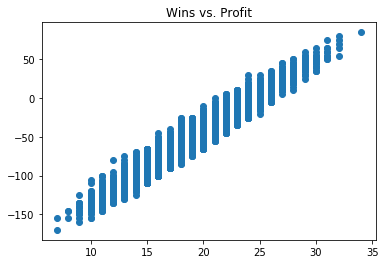

In [5]:
plt.scatter(x,y)
plt.title('Wins vs. Profit')
plt.xlabel('')
corr, p = pearsonr(x,y)
print(corr)
print(p)

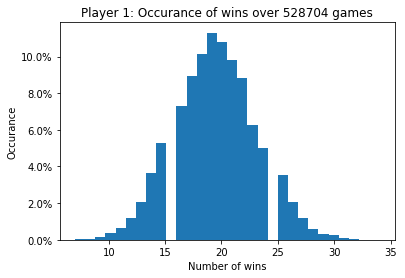

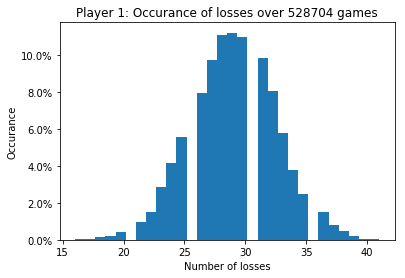

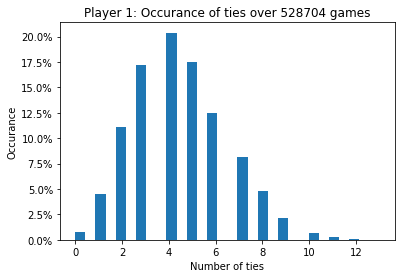



The mean value for player 1 wins over 528704 games: 19.4481, SD: 3.591087076360026


In [6]:
# lets plot the histograms for the number of wins, losses, ties for each player
w1 = all_p1_wins
plt.hist(w1, bins = 30, weights=np.ones(len(w1)) / len(w1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 1: Occurance of wins over {:} games'.format(np.sum(games_1)))
plt.xlabel('Number of wins')
plt.ylabel('Occurance')
plt.show();

l1 = all_p1_loss
plt.hist(l1, bins = 30, weights=np.ones(len(l1)) / len(l1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 1: Occurance of losses over {:} games'.format(np.sum(games_1)))
plt.xlabel('Number of losses')
plt.ylabel('Occurance')
plt.show();
    
t1 = all_p1_ties
plt.hist(t1, bins = 30, weights=np.ones(len(t1)) / len(t1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 1: Occurance of ties over {:} games'.format(np.sum(games_1)))
plt.xlabel('Number of ties')
plt.ylabel('Occurance')
plt.show();
print('')
print('')
print('The mean value for player 1 wins over {} games: {}, SD: {}'.format((np.sum(games_1)), (np.mean(w1)), (np.std(w1))))

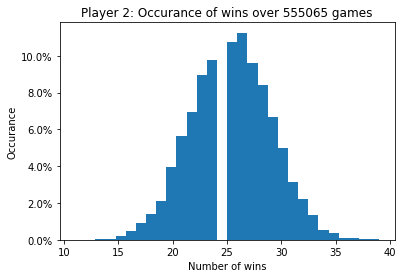

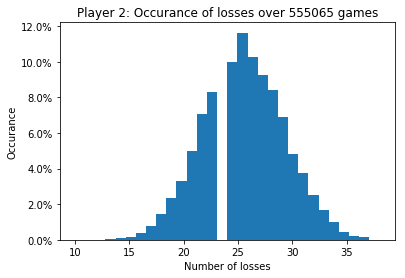

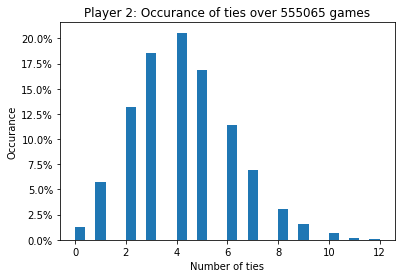



The mean value for player 2 wins over 555065 games: 25.3557, SD: 3.6631649580656336


In [7]:
# lets plot the histograms for the number of wins, losses, ties for each player
w2 = all_p2_wins
plt.hist(w2, bins = 30, weights=np.ones(len(w2)) / len(w2))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 2: Occurance of wins over {:} games'.format(np.sum(games_2)))
plt.xlabel('Number of wins')
plt.ylabel('Occurance')
plt.show();

l2 = all_p2_loss
plt.hist(l2, bins = 30, weights=np.ones(len(l2)) / len(l2))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 2: Occurance of losses over {:} games'.format(np.sum(games_2)))
plt.xlabel('Number of losses')
plt.ylabel('Occurance')
plt.show();
    
t2 = all_p2_ties
plt.hist(t2, bins = 30, weights=np.ones(len(t2)) / len(t2))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 2: Occurance of ties over {:} games'.format(np.sum(games_2)))
plt.xlabel('Number of ties')
plt.ylabel('Occurance')
plt.show();
print('')
print('')
print('The mean value for player 2 wins over {} games: {}, SD: {}'.format((np.sum(games_2)), (np.mean(w2)), (np.std(w2))))

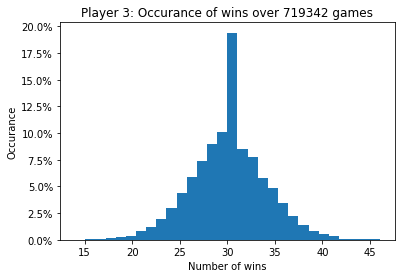

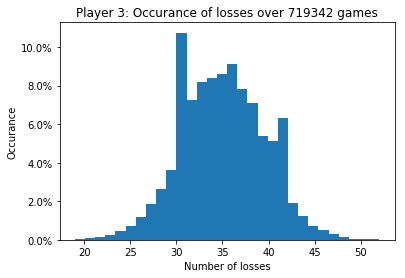

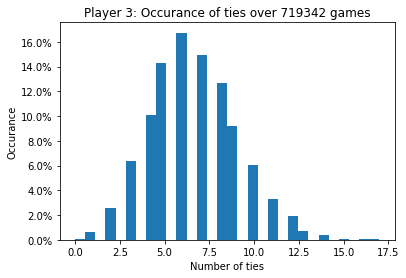



The mean value for player 3 wins over 719342 games: 30.1052, SD: 4.045458312725518


In [8]:
# lets plot the histograms for the number of wins, losses, ties for each player
w3 = all_p3_wins
plt.hist(w3, bins = 30, weights=np.ones(len(w3)) / len(w3))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 3: Occurance of wins over {:} games'.format(np.sum(games_3)))
plt.xlabel('Number of wins')
plt.ylabel('Occurance')
plt.show();

l3 = all_p3_loss
plt.hist(l3, bins = 30, weights=np.ones(len(l3)) / len(l3))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 3: Occurance of losses over {:} games'.format(np.sum(games_3)))
plt.xlabel('Number of losses')
plt.ylabel('Occurance')
plt.show();
    
t3 = all_p3_ties
plt.hist(t3, bins = 30, weights=np.ones(len(t3)) / len(t3))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Player 3: Occurance of ties over {:} games'.format(np.sum(games_3)))
plt.xlabel('Number of ties')
plt.ylabel('Occurance')
plt.show();
print('')
print('')
print('The mean value for player 3 wins over {} games: {}, SD: {}'.format((np.sum(games_3)), (np.mean(w3)), (np.std(w3))))

In [9]:
stats.ttest_ind(w2, w3)

Ttest_indResult(statistic=-87.0223772272296, pvalue=0.0)

In [10]:
t_rs1 = []
t_ps1 = []

t_rs2 = []
t_ps2 = []

t_rs3 = []
t_ps3 = []

for i in range(10000):
    
    games_played_1, win_loss_1, r_count_at_round_1, t_count_at_round_1, m1, m11 = p1_play_blackjack(6,5)
    x1 = (t_count_at_round_1)
    y1 = np.cumsum(win_loss_1)
    corr1, p1 = pearsonr(x1,y1)
    t_rs1.append(corr1)
    t_ps1.append(p1)
    
    games_played_2, win_loss_2, r_count_at_round_2, t_count_at_round_2, m2, m22 = p2_play_blackjack(6,5)
    x2 = (t_count_at_round_2)
    y2 = np.cumsum(win_loss_2)
    corr2, p2 = pearsonr(x2,y2)
    t_rs2.append(corr2)
    t_ps2.append(p2)
    
    games_played_3, win_loss_3, r_count_at_round_3, t_count_at_round_3, m3, m33 = p3_play_blackjack(6,5)
    x3 = (t_count_at_round_3)
    y3 = np.cumsum(win_loss_3)
    corr3, p3 = pearsonr(x3,y3)
    t_rs3.append(corr3)
    t_ps3.append(p3)

/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2406: RuntimeWarning: divide by zero encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:3007: RuntimeWarning: invalid value encountered in subtract
  xm, ym = x - mx, y - my
/home/noamb/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:3008: RuntimeWarning: invalid value encountered in reduce
  r_num = np.add.reduce(xm * ym)
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2406: RuntimeWarning: invalid value encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2179: RuntimeWarning: invalid value encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2179: RuntimeWarning: divide by zero encountered in true_divide
/home/noamb/ENTER/lib/python3.7/site-packages/scipy/stats/stats.py:3008: RuntimeWarning: invalid value encountered in multiply
  r_num = np.add.reduce(xm * ym)


In [11]:
# test the linear r and p values for players 1,2,3 in relation to the count    
t_r1 = np.mean(t_rs1)
std_tr1 = np.std(t_rs1)

t_p1 = np.mean(t_ps1)
std_tp1 = np.std(t_ps1)


t_r2 = np.mean(t_rs2)
std_tr2 = np.std(t_rs2)

t_p2 = np.mean(t_ps2)
std_tp2 = np.std(t_ps2)

    
t_r3 = np.mean(t_rs3)
std_tr3 = np.std(t_rs3)

t_p3 = np.mean(t_ps3)
std_tp3 = np.std(t_ps3)

print('Linear correlation (player 1): There is a {:.1f}% chance that the wins and true count are correlated. p={:}'
      .format((np.absolute(t_r1*100.)), t_p1))
print('Linear correlation (player 2): There is a {:.1f}% chance that the wins and true count are correlated'
      .format((np.absolute(t_r2*100.)), t_p1))
print('Linear correlation (player 3): There is a {:.1f}% chance that the wins and true count are correlated'
      .format((np.absolute(t_r3*100.)), t_p1))

Linear correlation (player 1): There is a nan% chance that the wins and true count are correlated. p=0.5895500083697542
Linear correlation (player 2): There is a nan% chance that the wins and true count are correlated
Linear correlation (player 3): There is a 0.3% chance that the wins and true count are correlated


In [12]:
t_rs = []
t_ps = []

for i in range(100):
    games_played_3, win_loss_3, r_count_at_round_3, t_count_at_round_3, m3, m33 = p3_play_blackjack(6,5)
    x = (t_count_at_round_3)
    y = np.cumsum(win_loss_3)
    corr, p = (stats.spearmanr(x,y))
    t_rs.append(corr)
    t_ps.append(p)
    
t_r = np.mean(t_rs)
std_tr = np.std(t_rs)

t_p = np.mean(t_ps)
std_tp = np.std(t_ps)

print('Non-linear correlation: There is a {:.1f}% chance that the wins and true count are correlated'.format(np.absolute(t_r*100.)))

Non-linear correlation: There is a 6.1% chance that the wins and true count are correlated


In [13]:
# iterate through games with each player and test the correlation and signifigance of the count vs. wins
#empty lists to populate for the r and p value for each player
r1 = []
p1 = []

r2 = []
p2 = []

r3 = []
p3 = []

# loop through a 6 deck game 100 times and test correlation by appending values of r and p then taking the mean of each
for i in range(100): 
    
#     # lets start by taking the values of player one (who doesnt know how to play very well)
#     wins1 = []
#     count1 = []

#     games_played_1, win_loss_1, r_count_at_round_1, t_count_at_round_1, m1, m11 = p1_play_blackjack(6)
#     x1 = win_loss_1
#     get_indexes1 = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#     indexes1 = (get_indexes1(1,x1))

#     for i in win_loss_1:
#         if (i == 1):
#             wins1.append(i)
#     for i in indexes1:
#         count1.append(t_count_at_round_1[i])
        
#     x1 = count1
#     y1 = np.cumsum(wins1)
#     rs1, ps1 = (stats.pearsonr(x1,y1))
#     r1.append(rs1)
#     p1.append(ps1)

#     # again for player 2 (basic strategy)
#     wins2 = []
#     count2 = []

#     games_played_2, win_loss_2, r_count_at_round_2, t_count_at_round_2, m2, m22 = p2_play_blackjack(6)
#     x2 = win_loss_2
#     get_indexes2 = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
#     indexes2 = (get_indexes2(1,x2))

#     for i in win_loss_2:
#         if (i == 1):
#             wins2.append(i)
#     for i in indexes2:
#         count2.append(t_count_at_round_2[i])
        
#     x2 = count2
#     y2 = np.cumsum(wins2)
#     rs2, ps2 = (stats.pearsonr(x2,y2))
#     r2.append(rs2)
#     p2.append(ps2)
        
    # again for player 3 (card counter)
    wins3 = []
    count3 = []

    games_played_3, win_loss_3, r_count_at_round_3, t_count_at_round_3, m3, m33 = p3_play_blackjack(6, 5)
    x3 = win_loss_3
    get_indexes3 = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    indexes3 = (get_indexes3(1,x3))

    for i in win_loss_3:
        if (i == 1):
            wins3.append(i)
            
    for i in indexes3:
        count3.append(t_count_at_round_3[i])
    
        
    x3 = count3
    y3 = np.cumsum(wins3)
    rs3, ps3 = (stats.pearsonr(x3,y3))
    r3.append(rs3)
    p3.append(ps3)
    
# remove the infinities
r1 = [x for x in r1 if str(x) != 'nan']
r2 = [x for x in r2 if str(x) != 'nan']
r3 = [x for x in r3 if str(x) != 'nan']

p1 = [x for x in p1 if str(x) != 'nan']
p2 = [x for x in p2 if str(x) != 'nan']
p3 = [x for x in p3 if str(x) != 'nan']

print('correlation for wins and true count')
print('player 1 r:', np.mean(r1))
print('player 1 p:', np.mean(p1))

print('player 2 r:', np.mean(r2))
print('player 2 p:', np.mean(p2))

print('player 3 r:', np.mean(r3))
print('player 3 p:', np.mean(p3))

correlation for wins and true count
player 1 r: nan
player 1 p: nan
player 2 r: nan
player 2 p: nan
player 3 r: -0.02781283372005856
player 3 p: 0.15204797905720266


/home/noamb/ENTER/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/noamb/ENTER/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Number of wins')

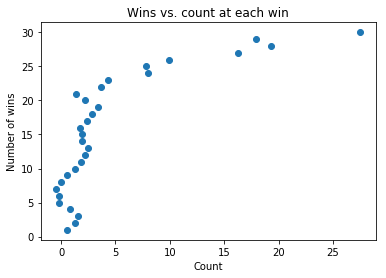

In [14]:
plt.scatter(x3, y3)
plt.title('Wins vs. count at each win')
plt.xlabel('Count')
plt.ylabel('Number of wins')

In [15]:
games_played_1, win_loss_1, r_count_at_round_1, t_count_at_round_1, m1 = p1_play_blackjack(6,5)
print(np.sum(t_count_at_round_1[:-1]))
print(m1)

/home/noamb/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:2179: RuntimeWarning: invalid value encountered in true_divide


ValueError: too many values to unpack (expected 5)

In [ ]:
# iterate through games with each player and test the correlation and signifigance of the count vs. wins
#empty lists to populate for the r and p value for each player
r1 = []
p1 = []

r2 = []
p2 = []

r3 = []
p3 = []

# loop through a 6 deck game 100 times and test correlation by appending values of r and p then taking the mean of each
for i in range(100): 
    
    # lets start by taking the values of player one (who doesnt know how to play very well)
    games_played_1, win_loss_1, r_count_at_round_1, t_count_at_round_1, m1, m11 = p1_play_blackjack(6,5)
    x1 = np.sum(t_count_at_round_1[:-1])
    y1 = np.cumsum(m1)
    rs1, ps1 = (stats.spearmanr(x1,y1))
    r1.append(rs1)
    p1.append(ps1)

    # again for player 2 (basic strategy)
    games_played_2, win_loss_2, r_count_at_round_2, t_count_at_round_2, m2, m22 = p2_play_blackjack(6,5)
    x2 = np.sum(t_count_at_round_2[:-1])
    y2 = np.cumsum(m2)
    rs2, ps2 = (stats.spearmanr(x2,y2))
    r2.append(rs2)
    p2.append(ps2)
        
    # again for player 3 (card counter)
    games_played_3, win_loss_3, r_count_at_round_3, t_count_at_round_3, m3, m33 = p3_play_blackjack(6,5)
    x3 = np.sum(t_count_at_round_3[:-1])
    y3 = np.cumsum(m3)
    rs3, ps3 = (stats.spearmanr(x3,y3))
    r3.append(rs3)
    p3.append(ps3)
    
# remove the infinities
r1 = [x for x in r1 if str(x) != 'nan']
r2 = [x for x in r2 if str(x) != 'nan']
r3 = [x for x in r3 if str(x) != 'nan']

p1 = [x for x in p1 if str(x) != 'nan']
p2 = [x for x in p2 if str(x) != 'nan']
p3 = [x for x in p3 if str(x) != 'nan']

print('correlation for profit and true count')
print('player 1 r:', np.mean(r1))
print('player 1 p:', np.mean(p1))

print('player 2 r:', np.mean(r2))
print('player 2 p:', np.mean(p2))

print('player 3 r:', np.mean(r3))
print('player 3 p:', np.mean(p3))

In [ ]:
# lets iterate through again and append and see if the data follows poisson statistics
for i in range(100):
    p1_wins = []
    p1_loss = []
    p1_ties = []

    p2_wins = []
    p2_loss = []
    p2_ties = []

    p3_wins = []
    p3_loss = []
    p3_ties = []

    games1, wins1, r1, t1, m1, m11 =  p1_play_blackjack(6,5)
    games2, wins2, r2, t2, m2, m22 =  p2_play_blackjack(6,5)
    games3, wins3, r3, t3, m3, m33 =  p3_play_blackjack(6,5)
    
    games_1.append(games1)
    games_2.append(games2)
    games_3.append(games3)

    # create data sets for player 1
    for i in wins1:
        if (i == 1):
            p1_wins.append(i)
        elif (i == -1):
            p1_loss.append(i)
        elif (i == 0):
            p1_ties.append(i)
        else:
            pass

    # create data sets for player 2
    for i in wins2:
        if (i == 1):
            p2_wins.append(i)
        elif (i == -1):
            p2_loss.append(i)
        elif (i == 0):
            p2_ties.append(i)
        else:
            pass
    
    # create data sets for player 3
    for i in wins3:
        if (i == 1):
            p3_wins.append(i)
        elif (i == -1):
            p3_loss.append(i)
        elif (i == 0):
            p3_ties.append(i)
        else:
            pass
        
    all_p1_wins.append(len(p1_wins))
    all_p1_loss.append(len(p1_loss))
    all_p1_ties.append(len(p1_ties))

    all_p2_wins.append(len(p2_wins))
    all_p2_loss.append(len(p2_loss))
    all_p2_ties.append(len(p2_ties))

    all_p3_wins.append(len(p3_wins))
    all_p3_loss.append(len(p3_loss))
    all_p3_ties.append(len(p3_ties))

In [ ]:
mu1 = np.mean(all_p1_wins)

In [ ]:
std1 = np.std(all_p1_wins)

In [ ]:
print(mu1)

In [ ]:
print(std1)

In [ ]:
np.sqrt(mu1)